In [96]:
import matplotlib.pyplot as plt 
import numpy as np

In [97]:
m= 0.7
c =0.3

X = np.arange(0,1,0.02)
y = m*X+c

print("Shape of X = ",X.shape)
print("Shape of y = ",y.shape)

Shape of X =  (50,)
Shape of y =  (50,)


In [98]:
split = int(len(X)*0.8)
X_train , y_train = X[:split],y[:split]
X_test, y_test = X[split:],y[split:]
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(40,) (40,)
(10,) (10,)


In [99]:
def plot_data(X_train= X_train,y_train=y_train, X_test = X_test, y_test=y_test, predictions=None):
    plt.figure(figsize=(10,8))
    plt.scatter(X_train,y_train,c='b',s=10,label='Training Data')
    plt.scatter(X_test,y_test,c='r',s=10,label='Testing Data')
    if predictions is not None:
        plt.scatter(X_test,predictions,label="Predicted data")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title("Scatter Plot of X and y")

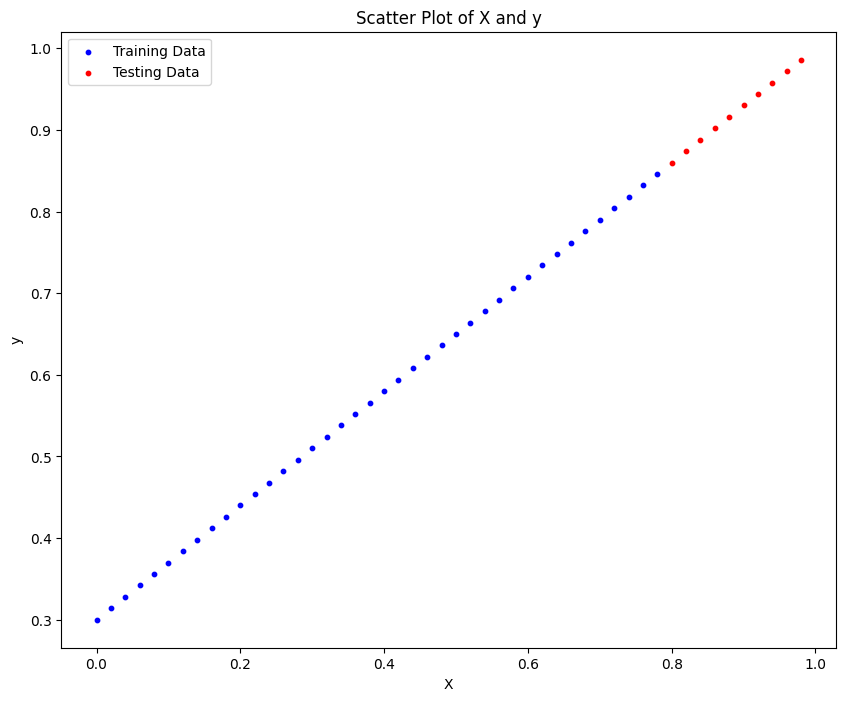

In [100]:
plot_data()

In [101]:
W = np.random.randn(1)
b= np.random.randn(1)
print(W,b)

[-1.05841117] [-1.45282533]


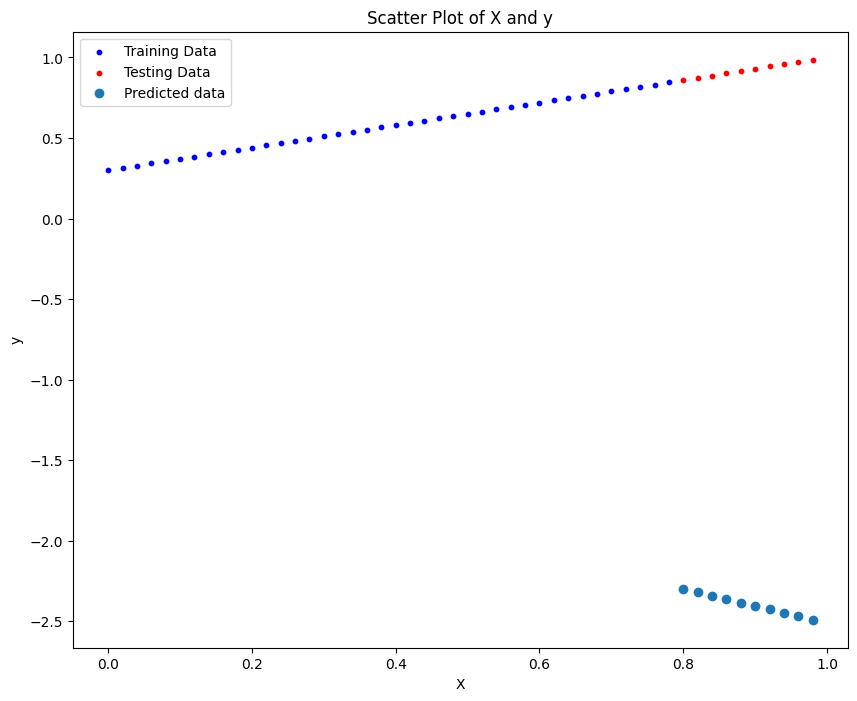

In [102]:
y_out = X_test*W+b
plot_data(predictions=y_out)

In [103]:
def loss_function(y_true,y_pred):
    return np.sum(np.square(y_true-y_pred))/len(y_true)


In [104]:
#Build training loop
epochs =100
alpha = 0.1
trainLossList = []
testLossList =[]


for epoch in range(epochs):
    #forwared pass
    y_pred = X_train *W+b 

    #compute train loss
    train_loss = loss_function(y_train,y_pred)
    trainLossList.append(train_loss)


    #compute  the gradient
    gradientW  = (-2*np.sum((y_train-y_pred)*X_train))/len(y_train)
    gradientb= (-2* np.sum(y_train - y_pred))/len(y_train)

    #backpropagate
    W= W - alpha*gradientW
    b= b-alpha*gradientb

    

    #compute test loss
    test_pred = X_test*W+b
    testLoss = loss_function(y_true=y_test,y_pred=test_pred)
    testLossList.append(testLoss)

    if(epoch%10 ==0):
        print(f"Epoch: {epoch} | Train Loss:{train_loss:.5f} | test Loss: {testLoss:.5f}")

Epoch: 0 | Train Loss:6.11160 | test Loss: 6.99929
Epoch: 10 | Train Loss:0.06656 | test Loss: 0.30126
Epoch: 20 | Train Loss:0.02971 | test Loss: 0.13515
Epoch: 30 | Train Loss:0.02457 | test Loss: 0.10609
Epoch: 40 | Train Loss:0.02042 | test Loss: 0.08779
Epoch: 50 | Train Loss:0.01698 | test Loss: 0.07296
Epoch: 60 | Train Loss:0.01411 | test Loss: 0.06065
Epoch: 70 | Train Loss:0.01173 | test Loss: 0.05042
Epoch: 80 | Train Loss:0.00975 | test Loss: 0.04191
Epoch: 90 | Train Loss:0.00811 | test Loss: 0.03484


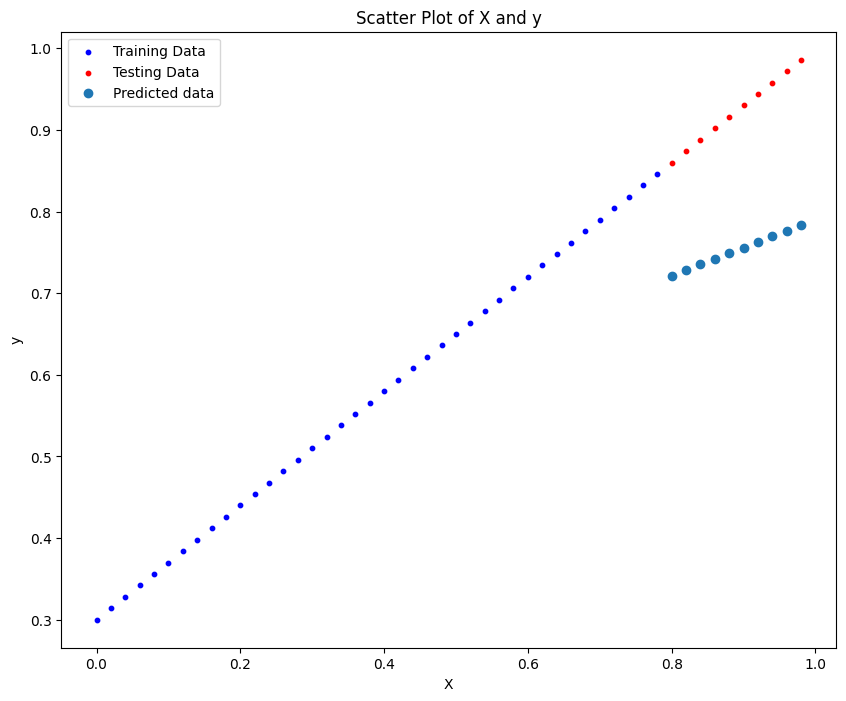

In [105]:
y_out = X_test*W + b
plot_data(predictions=y_out)

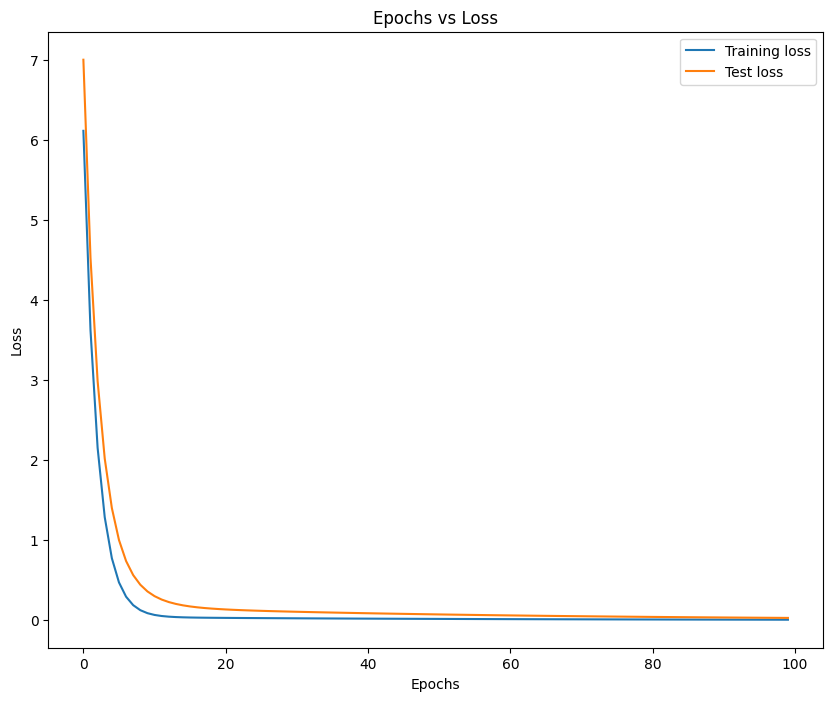

In [106]:
#plot loss curve 
plt.figure(figsize=(10,8))
plt.plot(range(epochs),trainLossList,label="Training loss")
plt.plot(range(epochs),testLossList,label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()